<h1 style="text-align: center;">[Daegu Apartement Predict Price]</h1>
<h3 style="text-align: center;">[Rachmawati Hapsari Putri]</h3>

---

## **Section 1. Business Understanding**

**1.1 Context**<br>

Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

**1.2 Problem Statements**

**How to predict apartment sale prices to guide property investments and optimize real estate development strategies?**  


**1.3 Goals**

To develop a model that predicts apartment sale prices by analyzing key factors such as size, year built, number of facilities, and nearby amenities. These predictions will help sellers set competitive and accurate prices, highlight valuable property features to attract buyers, and reduce the time properties stay on the market, ensuring maximum profit through informed, data-driven decisions.

**1.4 Analytical Approach**

To address the problem, we will analyze the data to uncover patterns in the features that distinguish one apartment from another. By identifying the relationships between these features and the apartment prices, we aim to gain valuable insights into the key drivers of pricing.

Next, we will build a regression model to predict apartment prices. This predictive tool will assist sellers in setting competitive and market-aligned prices for their properties. It will also enable better decision-making by providing a clear understanding of the factors influencing apartment prices, ensuring sellers maximize revenue while attracting buyers.

**1.5 Metric Evaluation (Business Metric, Machine Learning Evaluation Metric)**

**Business Metric**

- **Property Sale Revenue**:<br>
    Measures the total revenue generated from the sale of properties, which is the primary goal of the model. Accurate predictions of property prices directly contribute to maximizing revenue for sellers.


**Machine Learning Evaluation Metrics**

- **Mean Absolute Error (MAE)**:  
  MAE calculates the average of the absolute differences between the predicted and actual prices. It helps to understand the typical error size in predicting property prices. A lower MAE means the model's predictions are closer to the actual prices.

- **Root Mean Squared Error (RMSE)**:  
  RMSE gives more weight to larger errors than MAE, making it useful for identifying cases where the model's predictions are far off. It provides an overall measure of how spread out or varied the errors are. A smaller RMSE suggests more accurate predictions.

- **Mean Absolute Percentage Error (MAPE)**:  
  MAPE measures the average percentage difference between the predicted and actual prices. This is helpful for understanding the error relative to the actual price, and it makes it easier to compare accuracy across different price ranges. A lower MAPE indicates better prediction accuracy, especially for relative price accuracy.

- **R² (R-squared, Coefficient of Determination)**:  
  R² shows how well the model’s features (such as apartment size, location, and amenities) explain the variation in the target variable (property sale price). A higher R² means the model does a good job of capturing the factors that affect the sale price, making its predictions more reliable.

**1.6 Success Criteria**

- Achieve MAE and RMSE values that are sufficiently low compared to the average apartment price range.
- Obtain a MAPE of less than 5-10% to ensure consistent relative accuracy across varying price levels.
- Obtain an R² value of at least 0.8, meaning the model explains 80% or more of the variance in apartment prices.

## **Section 2. Data Understanding**

**2.1 General Information**

| Name | Description |
| ------------------ |------------------- |
Hallway Type| Apartment type
TimeToSubway| Time needed to the nearest subway station
SubwayStation| The name of the nearest subway station
N_FacilitiesNearBy(ETC)| The number of facilities nearby
N_FacilitiesNearBy(PublicOffice)| The number of public office facilities nearby
N_SchoolNearBy(University)| The number of universities nearby
N_Parkinglot(Basement)| The number of the parking lot
YearBuilt| The year the apartment was built
N_FacilitiesInApt| Number of facilities in the apartment
Size(sqft)| The apartment size (in square feet)
SalePrice| The apartment price (Won)

**2.2 Feature Information**

| Feature | Impact to Business |
|---------| ------------------ |
Hallway Type| Different apartment types often appeal to different buyers based on lifestyle, family size, or cultural preferences
TimeToSubway| Proximity to public transportation is a critical factor influencing convenience, demand, and value.
SubwayStation| The reputation and connectivity of a subway station (e.g., central, busy, or well-connected stations) can affect apartment desirability.
N_FacilitiesNearBy(ETC)| The availability of general facilities such as shops, restaurants, or parks enhances livability and demand.
N_FacilitiesNearBy(PublicOffice)| Proximity to government or administrative facilities improves convenience for residents who frequently access these services.
N_SchoolNearBy(University)| Proximity to universities increases demand from students, faculty, and investors looking for rental income
N_Parkinglot(Basement)| Adequate parking facilities significantly impact the convenience for car owners, particularly in urban areas where parking is limited.
YearBuilt| Newer apartments often have modern features and infrastructure, while older ones may need renovations, impacting desirability and pricing.
N_FacilitiesInApt| Facilities within the apartment complex (e.g., gyms, pools, security) increase convenience, lifestyle value, and overall attractiveness.
Size(sqft)| Apartment size is a fundamental factor influencing price. Larger apartments typically command higher values.

### Importing libraries & packages

In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from category_encoders import BinaryEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, StratifiedKFold

**Import Dataset**

In [129]:
df = pd.read_csv('data_daegu_apartment.csv')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


**2.3 Statistics Summary**

In [131]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


In [132]:
df.describe(include=object)

,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [133]:
pd.set_option('display.max_colwidth', None)
data = []
for col in df.columns:
    data.append([col, df[col].nunique(), df[col].unique()])

dgu = pd.DataFrame(data, columns=['Column Name', 'Number of Unique', 'Unique Sample'])
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


## **Section 3. Data Cleaning**

**3.1 Missing Values**

In [134]:
df.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

<Axes: >

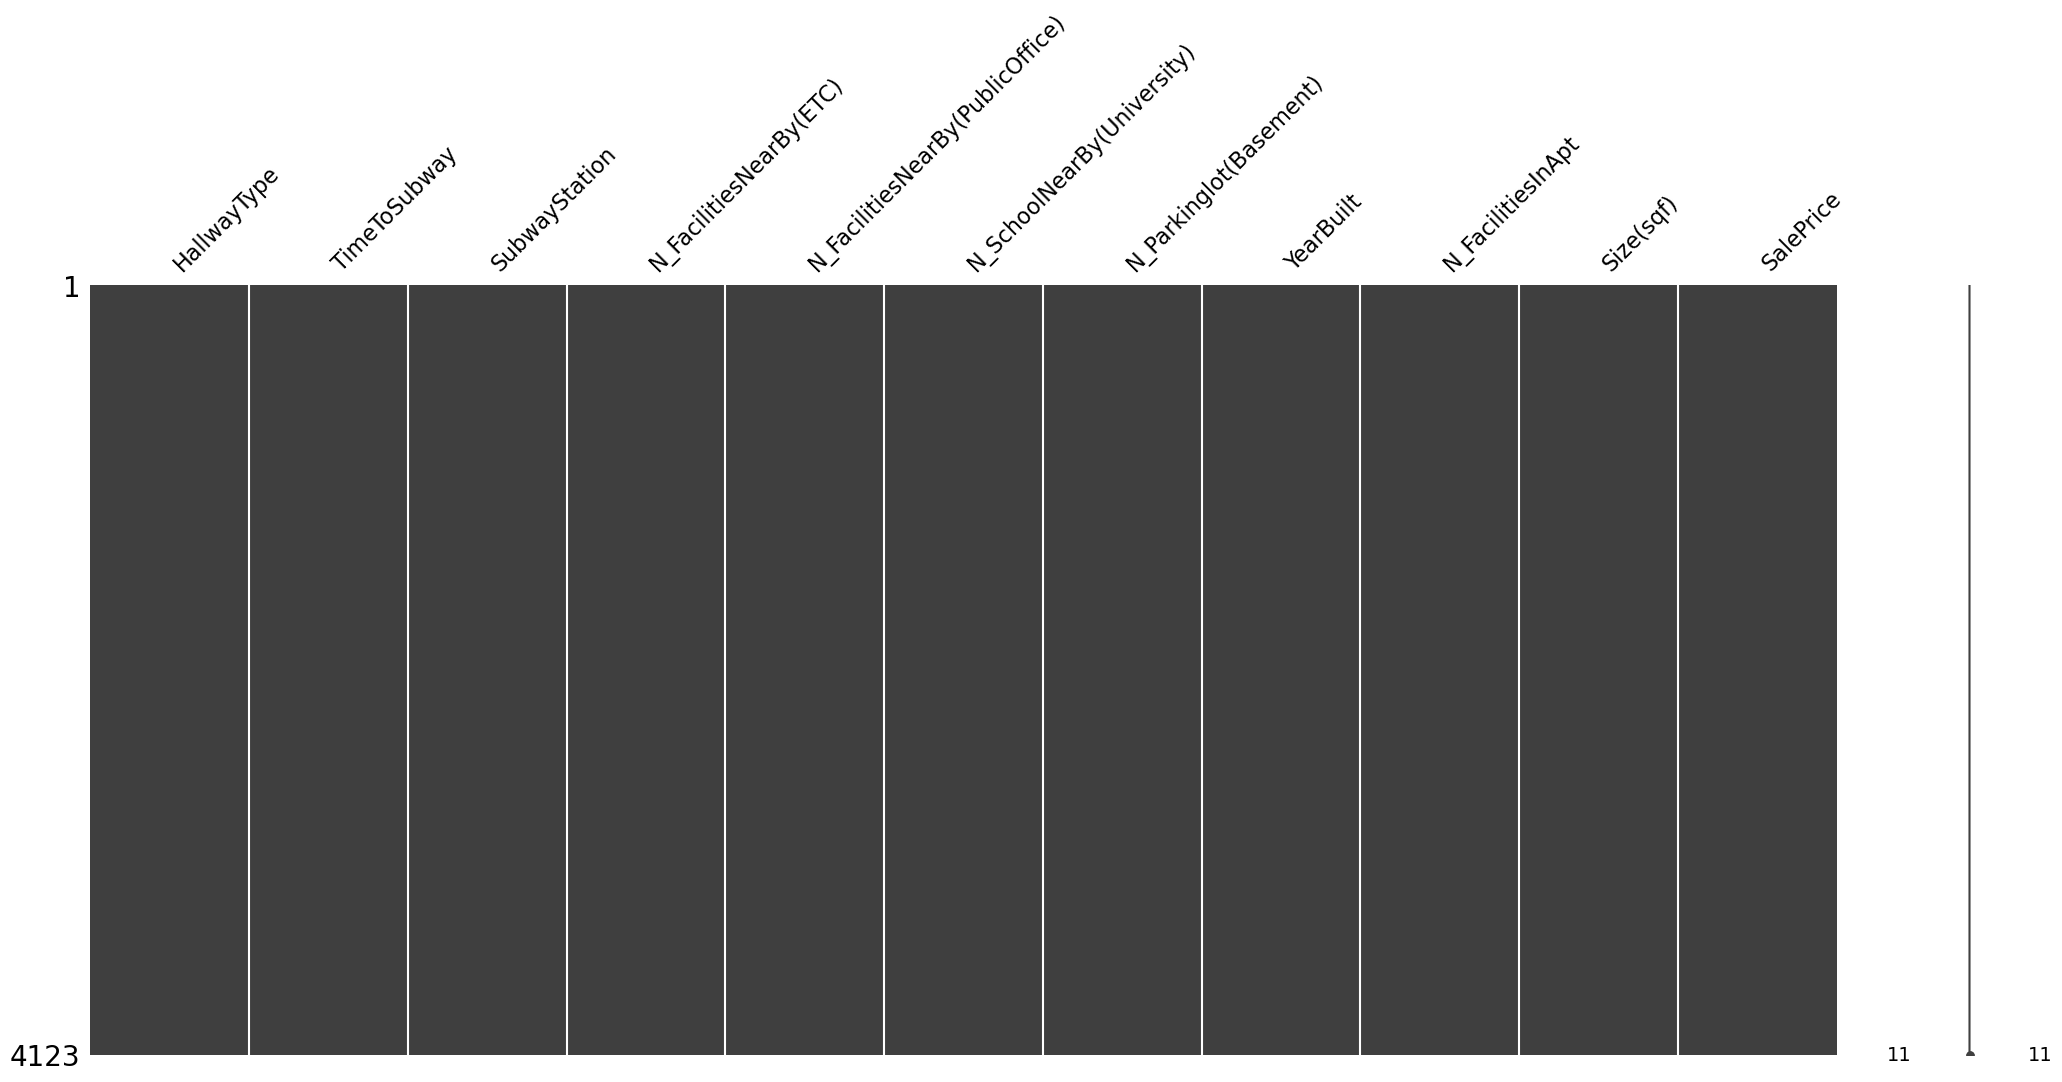

In [135]:
import missingno
missingno.matrix(df)

In [136]:
print(f'{(df.isnull().sum() / len(df)) * 100}')

HallwayType                         0.0
TimeToSubway                        0.0
SubwayStation                       0.0
N_FacilitiesNearBy(ETC)             0.0
N_FacilitiesNearBy(PublicOffice)    0.0
N_SchoolNearBy(University)          0.0
N_Parkinglot(Basement)              0.0
YearBuilt                           0.0
N_FacilitiesInApt                   0.0
Size(sqf)                           0.0
SalePrice                           0.0
dtype: float64


There is no Missing Values in this dataset

**3.2 Duplicated Values**

In [137]:
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


Unexpectedly, there is 1422 row of data duplicate in this dataset

In [138]:
df[(df['Size(sqf)'] == 910) & (df['SalePrice'] == 263345)]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
18,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
790,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1396,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
1970,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
2286,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345


To make sure the data duplicate, i try to see the size and price of one data, and turns out there is 6 duplicate of this data, so we need to remove it because the machine learning model is senistive with duplicate data. 

In [139]:
df.drop_duplicates(keep='first', inplace=True)
df.reset_index(drop=True, inplace=True)

In [140]:
df.shape

(2701, 11)

In [141]:
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
2696,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,818,290265
2697,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,345132
2698,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
2699,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477


**3.3 Identify Spelling Errors**

In [142]:
categoric_features = df.select_dtypes('object')

for col in categoric_features.columns:
    print(f"Total Category on '{col}': {df[col].nunique()}")

Total Category on 'HallwayType': 3
Total Category on 'TimeToSubway': 5
Total Category on 'SubwayStation': 8


In [143]:
for column in categoric_features.columns:
    print(f"Unique values in {column}:")
    print(categoric_features[column].unique())
    print("-" * 50)


Unique values in HallwayType:
['terraced' 'mixed' 'corridor']
--------------------------------------------------
Unique values in TimeToSubway:
['0-5min' '10min~15min' '15min~20min' '5min~10min' 'no_bus_stop_nearby']
--------------------------------------------------
Unique values in SubwayStation:
['Kyungbuk_uni_hospital' 'Chil-sung-market' 'Bangoge' 'Sin-nam'
 'Banwoldang' 'no_subway_nearby' 'Myung-duk' 'Daegu']
--------------------------------------------------


No Spelling error in this dataset

**3.4 Identify Anomaly Values**
- Check Distribution (Numerical Variable)
- Check Cardinality (Categorical Variable)

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
numeric_features = df.select_dtypes(include='number')

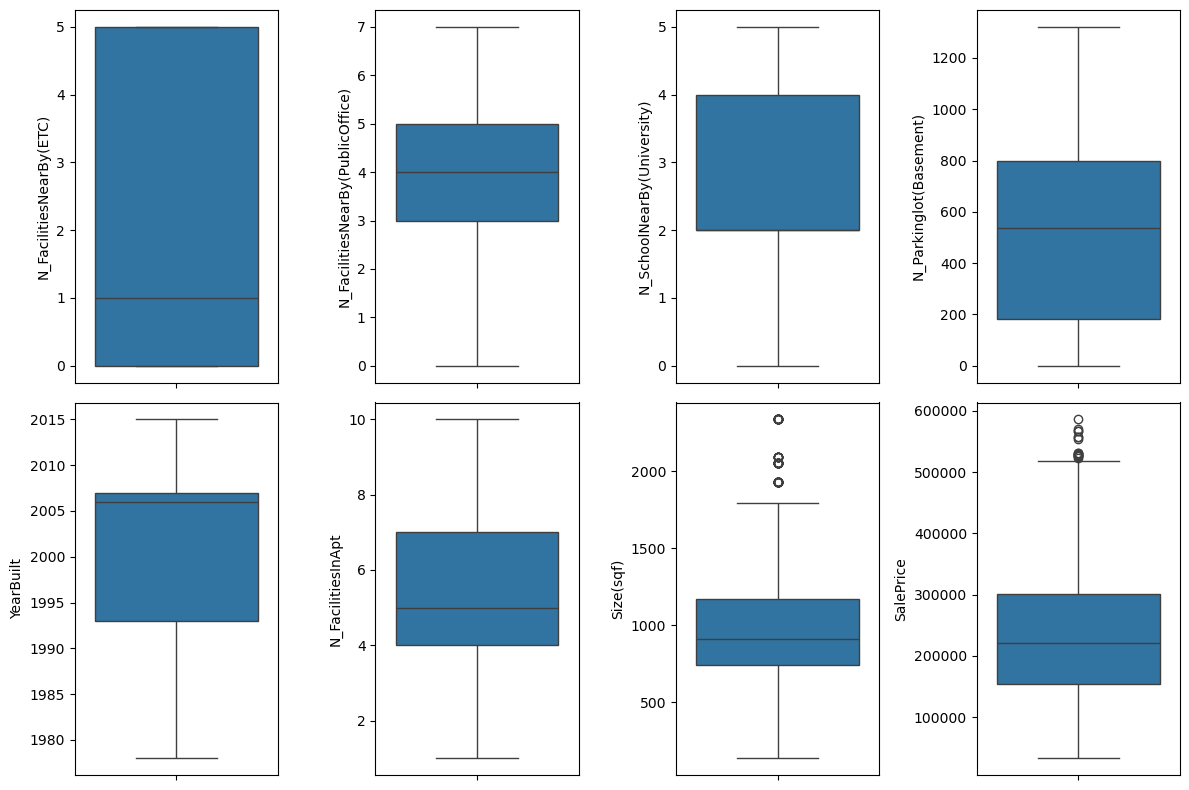

In [146]:
plt.figure(figsize=(12,8))
for idx,col in enumerate(numeric_features.columns, start=1):
    sns.boxplot(df[col], ax=plt.subplot(2, 4,idx))
plt.tight_layout()
plt.show()

There is no anomaly in the categoric feature, but there is outlier in Size and Price Column

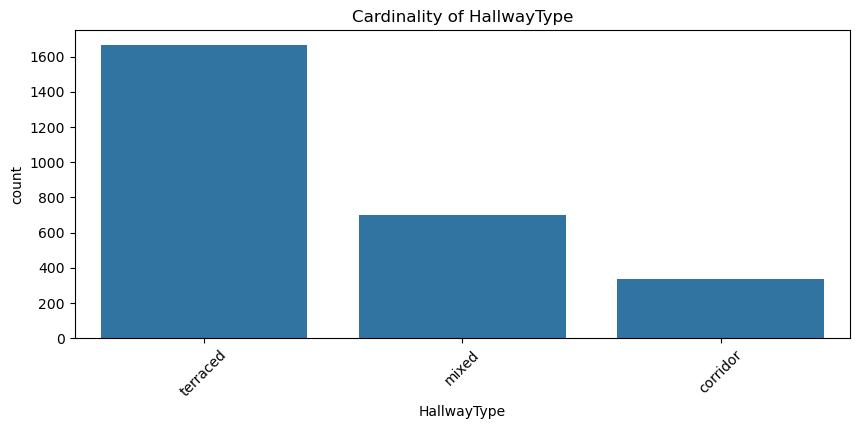

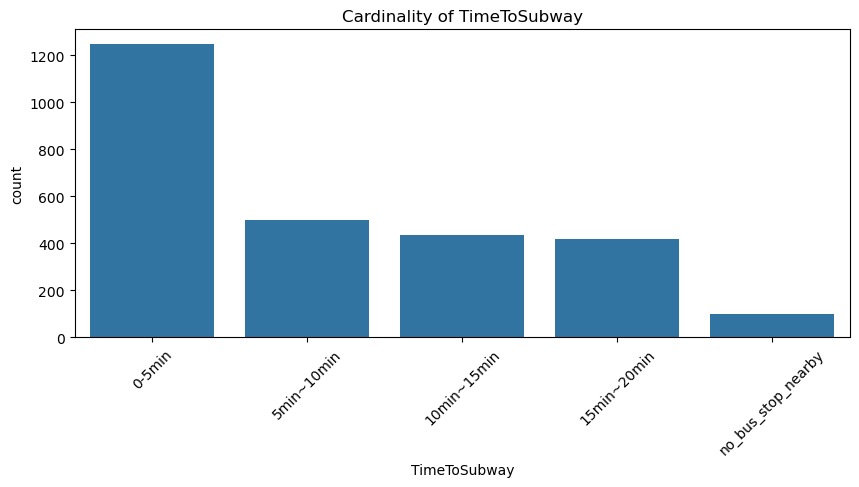

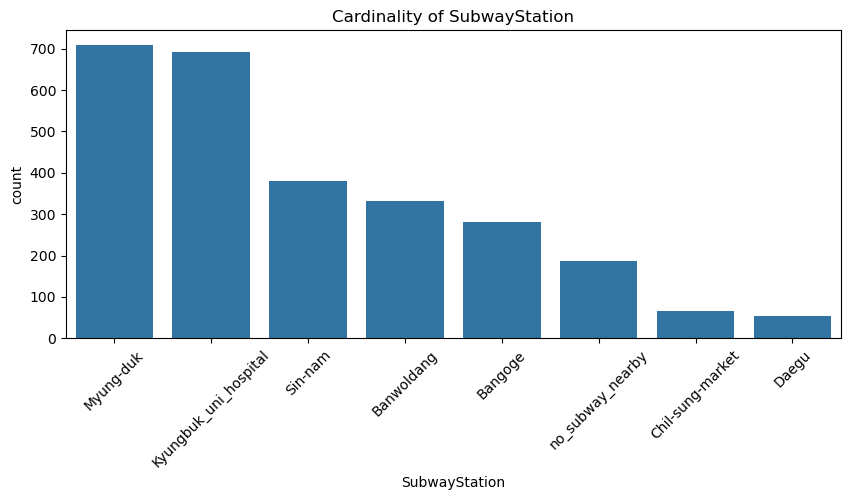

In [147]:
for col in categoric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Cardinality of {col}")
    plt.xticks(rotation=45)
    plt.show()

For categoric features, there is no anomaly data.

**3.5 Identify Outlier Values**

In [148]:
def find_outlier(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    lower_limit = q1 - limit
    upper_limit = q3 + limit
    print(f'lower: {lower_limit}')
    print(f'upper: {upper_limit}') 
    
    outliers = data[(data < lower_limit) | (data > upper_limit)]
    num_outliers = len(outliers)
    percentage_outliers = (num_outliers / len(data)) * 100

    print(f'Number of outliers: {num_outliers}')
    print(f'Percentage of outliers: {percentage_outliers:.2f}%')

In [149]:
find_outlier(df['SalePrice'])

IQR: 147345.0
lower: -67478.5
upper: 521901.5
Number of outliers: 17
Percentage of outliers: 0.63%


In [150]:
find_outlier(df['Size(sqf)'])

IQR: 424.0
lower: 107.0
upper: 1803.0
Number of outliers: 84
Percentage of outliers: 3.11%


In [151]:
(df['SalePrice'] > 521901.5).sum()

17

In [152]:
df[df['Size(sqf)'] > 1803.0].count()['Size(sqf)']

84

## **Section 4. Data Generation**

**4.1 Constructing `Seen` and `Unseen` Data**

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
df_seen, df_unseen= train_test_split(df, test_size=0.2, random_state=42)

**4.2 Constructing `Training` and `Testing` Data (from `Seen` Dataset)**

In [155]:
train, test = train_test_split(df_seen, test_size=0.2, random_state=42)

## **Section 5. Exploratory Data Analysis (EDA)**

**5.1 Check Distribution**

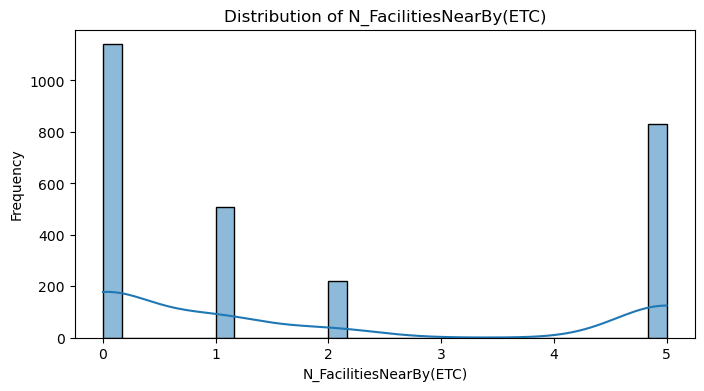

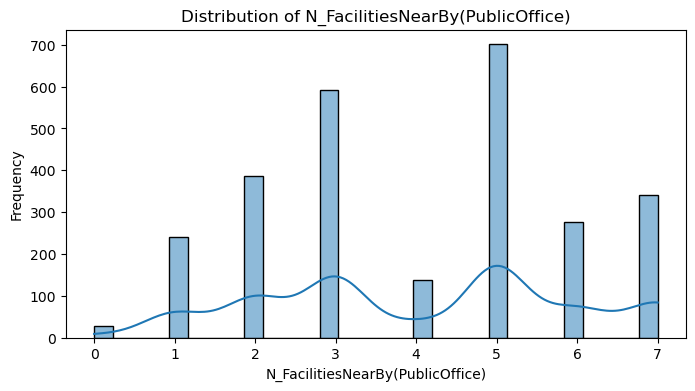

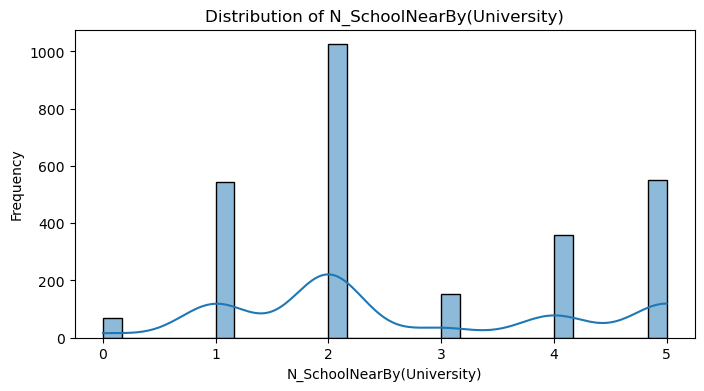

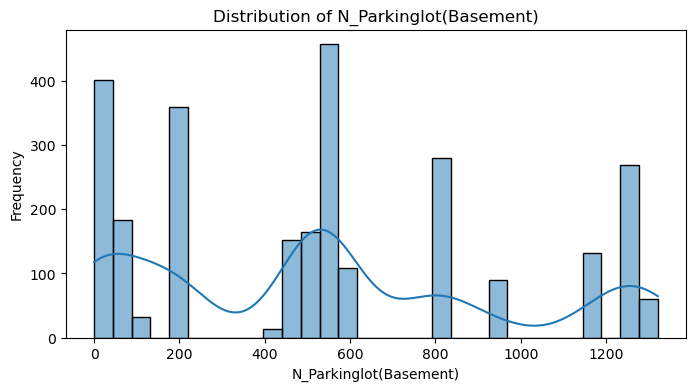

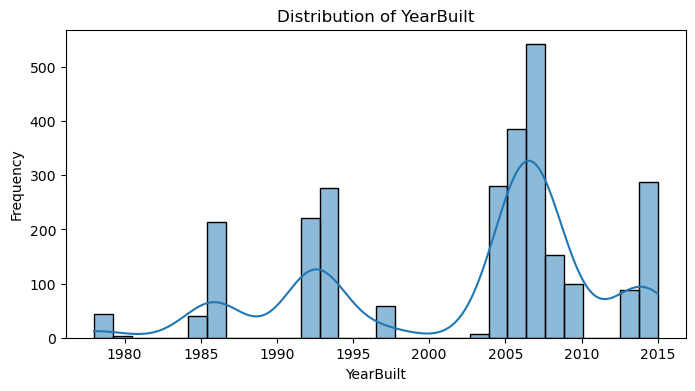

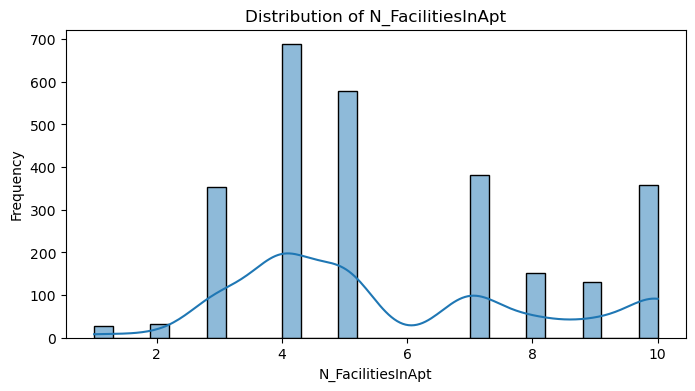

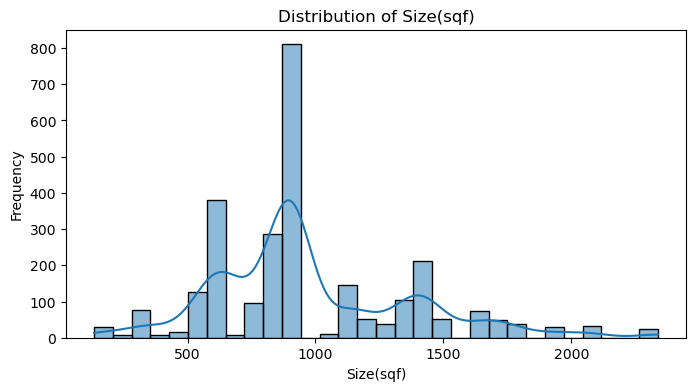

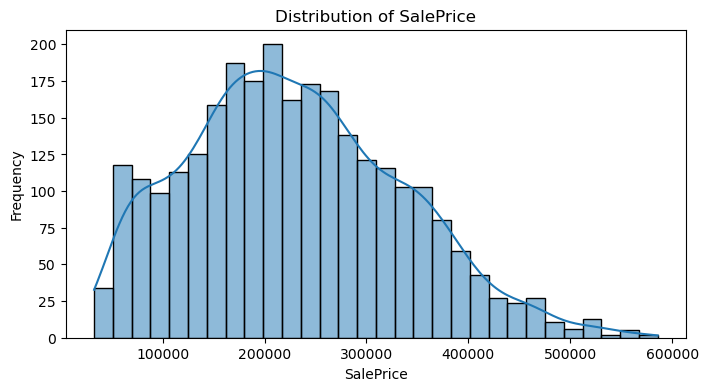

In [156]:
for column in numeric_features.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_features[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [157]:
print(f"Total Apartement in Nearest Subway Station:\n{df['SubwayStation'].value_counts()}")
print(f"\nType of Hallway Apartment:\n{df['HallwayType'].value_counts()}")

Total Apartement in Nearest Subway Station:
SubwayStation
Myung-duk                709
Kyungbuk_uni_hospital    692
Sin-nam                  380
Banwoldang               333
Bangoge                  280
no_subway_nearby         188
Chil-sung-market          65
Daegu                     54
Name: count, dtype: int64

Type of Hallway Apartment:
HallwayType
terraced    1667
mixed        698
corridor     336
Name: count, dtype: int64


In [158]:
subway_type = (df.groupby(['SubwayStation', 'HallwayType'])['HallwayType']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)
subway_time = (
    df.groupby(['SubwayStation', 'TimeToSubway'])['TimeToSubway']
    .count()
    .reset_index(name='Count')
    .sort_values(by='Count', ascending=False)
)

In [159]:
subway_time

,SubwayStation,TimeToSubway,Count
5,Kyungbuk_uni_hospital,0-5min,402
9,Myung-duk,15min~20min,353
10,Sin-nam,0-5min,333
1,Banwoldang,0-5min,301
6,Kyungbuk_uni_hospital,10min~15min,290
0,Bangoge,5min~10min,280
7,Myung-duk,0-5min,212
8,Myung-duk,10min~15min,144
13,no_subway_nearby,no_bus_stop_nearby,100
12,no_subway_nearby,5min~10min,88


In [160]:
subway_type

,SubwayStation,HallwayType,Count
7,Kyungbuk_uni_hospital,terraced,648
9,Myung-duk,mixed,353
12,Sin-nam,terraced,333
2,Banwoldang,terraced,301
0,Bangoge,mixed,280
10,Myung-duk,terraced,212
14,no_subway_nearby,terraced,160
8,Myung-duk,corridor,144
3,Chil-sung-market,mixed,65
11,Sin-nam,corridor,47


In [161]:
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,295575.0
Sin-nam,251327.0
Kyungbuk_uni_hospital,250884.5
no_subway_nearby,236725.5
Bangoge,179867.0


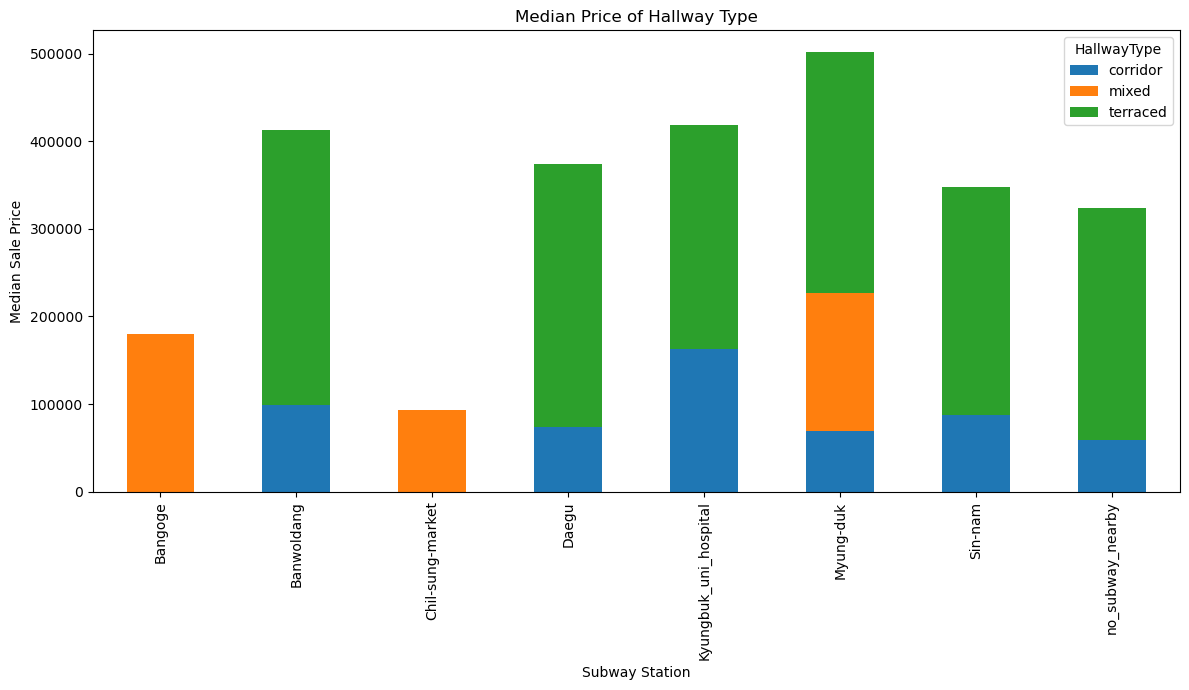

In [162]:
import matplotlib.pyplot as plt

# Create a pivot table
subway_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')

# Plot the pivot table as a stacked bar chart
pivot_plot = subway_pivot.plot.bar(stacked=True, figsize=(12, 7))

# Customize the plot
pivot_plot.set_xlabel('Subway Station')
pivot_plot.set_ylabel('Median Sale Price')
pivot_plot.set_title('Median Price of Hallway Type')

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

Text(0.5, 1.0, 'Hallway Type per Nearest Subway Station')

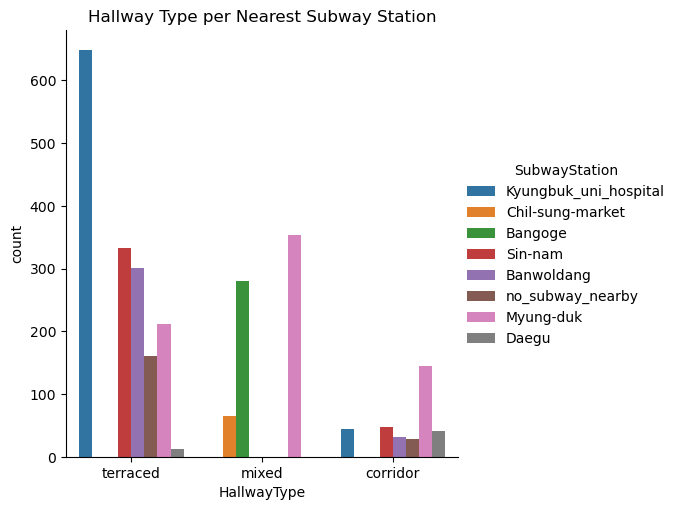

In [163]:
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df) 
plt.title('Hallway Type per Nearest Subway Station')

**5.2 Correlation Analysis**

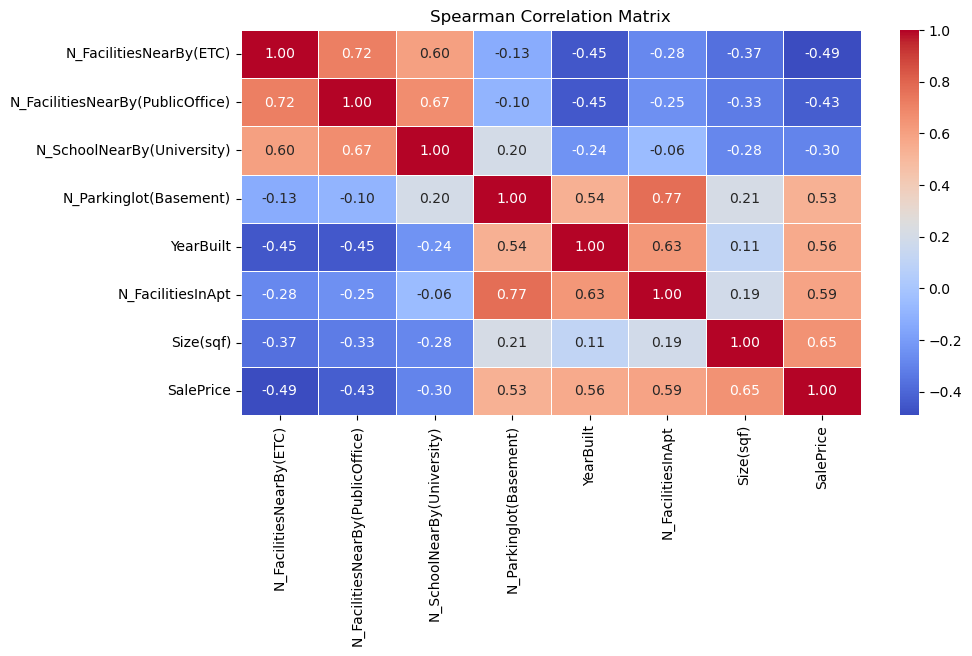

In [164]:
correlation_matrix = numeric_features.corr(method='spearman')
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

- Strong Positive Correlations:<br>
    SalePrice shows a strong positive correlation with:<br>
    - Size(sqf) (0.65): Larger apartments are associated with higher sale prices.
    - N_FacilitiesInApt (0.59): More facilities in an apartment complex increase its value.
    - YearBuilt (0.56): Newer buildings tend to have higher sale prices.
    - N_Parkinglot(Basement) and N_FacilitiesInApt (0.77): Apartments with basement parking lots tend to have more facilities.

- Negative Correlations:<br>
    SalePrice negatively correlates with:
    - N_FacilitiesNearBy(ETC) (-0.49): Apartments with many nearby facilities of type "ETC" tend to have lower sale prices.
    - N_FacilitiesNearBy(PublicOffice) (-0.43): The proximity to public offices seems to negatively influence prices.
    - YearBuilt and N_FacilitiesNearBy(ETC) (-0.45): Older apartments tend to be in areas with more general nearby facilities.

## **Section 6. Data Preparation**

**6.1 Initialization**
- Initialization function
- Define Feature and Target

In [165]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [166]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
# Data Testing
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

print(X_train.shape)
print(y_train.shape)

(1728, 10)
(1728,)


**6.2 Data Transformation (Feature Engineering)**

In [167]:
dgu

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min, no_bus_stop_nearby]"
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bangoge, Sin-nam, Banwoldang, no_subway_nearby, Myung-duk, Daegu]"
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76.0, 79.0, 181.0, 18.0]"
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, 1394, 903, 676, 355, 1419, 640, 1184, 1167, 135, 818, 206, 1643, 907, 1377, 2337, 1252, 451, 587, 811, 2056, 508, 576, 1366, 1103, 426, 281, 1327, 1092, 857, 1928, 1149, 1088, 1288, 1761, 1437, 1291, 2092, 636, 814, 871, 1519, 1444, 1451, 1448, 1313, 1256, 1796, 1192, 1035, 846, 273, 277, 779, 498, 736, 138, 430, 213, 163, 1369, 192, 547, 839, 160, 793, 1085, 1060, 832]"


In [168]:
base_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'Size(sqf)',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [169]:
bin_transformer = ColumnTransformer(transformers=[
    ('OneHotEncoding', OneHotEncoder(), ['HallwayType', 'TimeToSubway', 'SubwayStation']),
    ('Binning', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), ['Size(sqf)']),
    ('RobustScaling', RobustScaler(), [
        'N_FacilitiesNearBy(ETC)', 
        'N_FacilitiesNearBy(PublicOffice)', 
        'N_SchoolNearBy(University)', 
        'N_FacilitiesInApt',
        'N_Parkinglot(Basement)',
        'YearBuilt'
    ])
], remainder='passthrough', verbose_feature_names_out=False)

In [170]:
base_transformer.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'Size(sqf)',
                                  'N_Parkinglot(Basement)', 'YearBuilt'])],
                  verbose_feature_names_out=False)

In [171]:
bin_transformer.fit(X_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['HallwayType', 'TimeToSubway',
                                  'SubwayStation']),
                                ('Binning',
                                 KBinsDiscretizer(encode='ordinal',
                                                  strategy='uniform'),
                                 ['Size(sqf)']),
                                ('RobustScaling', RobustScaler(),
                                 ['N_FacilitiesNearBy(ETC)',
                                  'N_FacilitiesNearBy(PublicOffice)',
                                  'N_SchoolNearBy(University)',
                                  'N_FacilitiesInApt', 'N_Parkinglot(Basement)',
                                  'YearBuilt'])],
                  verbose_feature_names_out=False)

**6.3 Overview**

## **Section 7. Model Development**

In [172]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
ada = AdaBoostRegressor(random_state=1)

base_model = [lr,knn,dt,rf,xgb,ada]

In [173]:
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)
log_ada = TransformedTargetRegressor(ada, func=np.log, inverse_func=np.exp)

target_model = [log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]

In [174]:
from sklearn.dummy import DummyRegressor  # Placeholder for a model if needed

# Define the pipelines with a placeholder model
base_reg = Pipeline(steps=[
    ('FeatureEngineering', base_transformer),
    ('Modeling', None) 
])

bin_reg = Pipeline(steps=[
    ('FeatureEngineering', bin_transformer),
    ('Modeling', None) 
])

In [175]:
list_model =[lr,knn,dt,rf,xgb,ada,log_lr,log_knn,log_dt,log_rf,log_xgb,log_ada]
list_transformer = [base_transformer, bin_transformer]
list_pipeline = [base_reg, bin_reg]

In [176]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold

# Define lists to store the results for each metric
score_rmse, score_mae, score_mape, score_r2 = [], [], [], []
mean_rmse, mean_mae, mean_mape, mean_r2 = [], [], [], []
std_rmse, std_mae, std_mape, std_r2 = [], [], [], []
best_estimators = []  # To track the best estimators (pipelines)

# Cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# List of custom labels for pipelines
pipeline_labels = ['Base Pipeline', 'Binary Pipeline']

# Model and label mapping
list_model = [lr, knn, dt, rf, xgb, ada, log_lr, log_knn, log_dt, log_rf, log_xgb, log_ada]
model_labels = [
    'Linear Regressor', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor',
    'XGBoost Regressor', 'AdaBoost Regressor', 'Log-Transformed Linear Regressor',
    'Log-Transformed KNN Regressor', 'Log-Transformed Decision Tree Regressor',
    'Log-Transformed Random Forest Regressor', 'Log-Transformed XGBoost Regressor',
    'Log-Transformed AdaBoost Regressor'
]

# Define transformers
list_transformer = [base_transformer, bin_transformer]

# Loop through each combination of model and transformer and set pipeline parameters
for model, model_label in zip(list_model, model_labels):
    for transformer, transformer_label in zip(list_transformer, pipeline_labels):
        # Create a new pipeline with the specific transformer and model
        pipeline = Pipeline(steps=[
            ('FeatureEngineering', transformer),
            ('Modeling', model)
        ])
        
        # Perform cross-validation and track results for each model-transformer combination
        model_rmse = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_root_mean_squared_error')
        score_rmse.append(model_rmse)
        mean_rmse.append(np.mean(model_rmse))
        std_rmse.append(np.std(model_rmse))

        # Repeat for other metrics (MAE, MAPE, R²)
        model_mae = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_error')
        score_mae.append(model_mae)
        mean_mae.append(np.mean(model_mae))
        std_mae.append(np.std(model_mae))

        model_mape = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='neg_mean_absolute_percentage_error')
        score_mape.append(model_mape)
        mean_mape.append(np.mean(model_mape))
        std_mape.append(np.std(model_mape))

        model_r2 = cross_val_score(pipeline, X_train, y_train, cv=crossval, scoring='r2')
        score_r2.append(model_r2)
        mean_r2.append(np.mean(model_r2))
        std_r2.append(np.std(model_r2))

        # Append the pipeline to the list of best estimators (pipelines)
        best_estimators.append(pipeline)

# Store results in a DataFrame with custom labels
results_df = pd.DataFrame({
    'Model': [model_label for model_label in model_labels for _ in list_transformer],
    'Transformer': [transformer_label for _ in model_labels for transformer_label in pipeline_labels],
    'Mean_RMSE': mean_rmse,
    'Std_RMSE': std_rmse,
    'Mean_MAE': mean_mae,
    'Std_MAE': std_mae,
    'Mean_MAPE': mean_mape,
    'Std_MAPE': std_mape,
    'Mean_R2': mean_r2,
    'Std_R2': std_r2
})

# Sort the results based on Mean R² score (or any other metric)
results_df_sorted = results_df.sort_values(by='Mean_R2', ascending=False)

# Display the sorted results
display(results_df_sorted)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\preprocessing\_discretizat

,Model,Transformer,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2,Std_R2
18,Log-Transformed Random Forest Regressor,Base Pipeline,-46225.832901,1552.502144,-36829.864690,1654.163297,-0.184366,0.010562,0.802547,0.017529
20,Log-Transformed XGBoost Regressor,Base Pipeline,-46299.098048,1514.056628,-36833.278085,1623.239331,-0.184379,0.010573,0.801956,0.017115
8,XGBoost Regressor,Base Pipeline,-46602.217966,1755.714669,-37230.727179,1475.425597,-0.191230,0.011788,0.798999,0.021760
6,Random Forest Regressor,Base Pipeline,-46604.512880,1849.016158,-37206.941022,1488.270461,-0.191241,0.011782,0.798902,0.022732
4,Decision Tree Regressor,Base Pipeline,-46910.219824,2207.716301,-37261.503461,1431.342563,-0.191680,0.012084,0.796012,0.026500
16,Log-Transformed Decision Tree Regressor,Base Pipeline,-47036.087795,2278.414113,-36943.683537,1549.530593,-0.185736,0.011366,0.794951,0.026601
5,Decision Tree Regressor,Binary Pipeline,-48772.895328,2446.781968,-39127.302683,1423.688427,-0.200228,0.012012,0.779654,0.027898
7,Random Forest Regressor,Binary Pipeline,-48783.763887,2520.709109,-39156.600275,1453.539932,-0.200267,0.012024,0.779499,0.028654
9,XGBoost Regressor,Binary Pipeline,-48805.431017,2488.817614,-39130.980306,1425.397089,-0.200278,0.012073,0.779325,0.028395
17,Log-Transformed Decision Tree Regressor,Binary Pipeline,-48925.156022,2472.884027,-38829.446802,1577.485567,-0.193468,0.011075,0.778395,0.027173


In [177]:
# Identify the best estimator based on Mean R² score
best_base_index = results_df_sorted.index[0]  # Get the index of the best row (highest Mean_R2)
best_base_model = results_df_sorted.loc[best_base_index, 'Model']  # Extract the best model
best_base_score = results_df_sorted.loc[best_base_index, 'Mean_R2']  # Extract the best R² score

print(f"Best Model: {best_base_model}")
print(f"Best Mean R² Score: {best_base_score}")

Best Model: Log-Transformed Random Forest Regressor
Best Mean R² Score: 0.8025468609694425


In [178]:
# Now, we can safely access the best pipeline (estimator) by index
best_base_estimator = best_estimators[best_base_index]
best_base_estimator

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt'])],
                                   verbose_feature_names_out=False)),
                ('Modeling',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(random_state=1)))])

In [179]:
print(f"Best Estimator (Pipeline): {best_base_estimator}")

Best Estimator (Pipeline): Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                     

In [180]:
# Step 1: Train the best pipeline on the full training data
best_base_estimator.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = best_base_estimator.predict(X_test)

# Step 3: Evaluate the predictions (optional)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Calculate evaluation metrics for training data (on y_train)
y_train_pred = best_base_estimator.predict(X_train)

# RMSE, MAE, MAPE, R² for training data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred)  # MAPE instead of MSE
train_r2 = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for test data (on y_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_mape = mean_absolute_percentage_error(y_test, y_pred)  # MAPE instead of MSE
test_r2 = r2_score(y_test, y_pred)

# Print out the evaluation metrics
print(f"Training Data Performance:")
print(f"RMSE: {train_rmse}")
print(f"MAE: {train_mae}")
print(f"MAPE: {train_mape}")
print(f"R²: {train_r2}")

print(f"\nTest Data Performance:")
print(f"RMSE: {test_rmse}")
print(f"MAE: {test_mae}")
print(f"MAPE: {test_mape}")
print(f"R²: {test_r2}")

Training Data Performance:
RMSE: 43606.82361834044
MAE: 34784.85071604624
MAPE: 0.17326828904575337
R²: 0.8261552941716417

Test Data Performance:
RMSE: 47552.409956850715
MAE: 37832.87034722616
MAPE: 0.19701076320229494
R²: 0.8099767735750377


In [181]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
import numpy as np

# Define the hyperparameter grid for tuning Random Forest within TransformedTargetRegressor
hyperparam_rf = {
    "modeling__regressor__n_estimators": [100, 200, 300, 400],  # Number of trees
    "modeling__regressor__max_depth": [10, 20, 30, None],  # Maximum depth of trees
    "modeling__regressor__min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "modeling__regressor__min_samples_leaf": [1, 2, 4],  # Minimum samples at a leaf
    "modeling__regressor__max_features": ['sqrt'],  # Features to consider for splits
}


# Define the pipeline with the base transformer and RandomForestRegressor
base_pipe_rf = Pipeline([
    ("FeatureEngineering", base_transformer),  # Feature engineering step
    ("modeling", log_rf)  # Ensure `log_rf` is a TransformedTargetRegressor wrapping RandomForestRegressor
])

# Setup GridSearchCV for hyperparameter tuning with Random Forest
base_tune_rf = RandomizedSearchCV(
    estimator=base_pipe_rf,
    param_distributions=hyperparam_rf,
    n_iter=144,  # Match the total parameter space
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'r2'],
    refit="r2",
    n_jobs=-1,
    verbose=1
)

# Fit the GridSearchCV model
base_tune_rf.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('FeatureEngineering',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OneHotEncoding',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType',
                                                                                'TimeToSubway',
                                                                                'SubwayStation']),
                                                                              ('RobustScaling',
                                                                               RobustScaler(),
                                                                               ['N_FacilitiesNearBy(ETC)',
                                                                                'N_FacilitiesNearBy(PublicOffice)',
                                                                                '...
                   param_distributions={'modeling__regressor__max_depth': [10,
                                                                           20,
                                                                           30,
                                                                           None],
                                        'modeling__regressor__max_features': ['sqrt'],
                                        'modeling__regressor__min_samples_leaf': [1,
                                                                                  2,
                                                                                  4],
                                        'modeling__regressor__min_samples_split': [2,
                                                                                   5,
                                                                                   10],
                                        'modeling__regressor__n_estimators': [100,
                                                                              200,
                                                                              300,
                                                                              400]},
                   refit='r2',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error', 'r2'],
                   verbose=1)

In [182]:
# Access the best model and hyperparameters
best_model_rf = base_tune_rf.best_estimator_
best_params_rf = base_tune_rf.best_params_

# Print best model and hyperparameters
print("Best Hyperparameters:", best_params_rf)
print(f"Best cross-validation score: {base_tune_rf.best_score_}")

Best Hyperparameters: {'modeling__regressor__n_estimators': 400, 'modeling__regressor__min_samples_split': 10, 'modeling__regressor__min_samples_leaf': 1, 'modeling__regressor__max_features': 'sqrt', 'modeling__regressor__max_depth': 10}
Best cross-validation score: 0.8034177705313811


In [183]:
best_model_rf

Pipeline(steps=[('FeatureEngineering',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoding',
                                                  OneHotEncoder(),
                                                  ['HallwayType',
                                                   'TimeToSubway',
                                                   'SubwayStation']),
                                                 ('RobustScaling',
                                                  RobustScaler(),
                                                  ['N_FacilitiesNearBy(ETC)',
                                                   'N_FacilitiesNearBy(PublicOffice)',
                                                   'N_SchoolNearBy(University)',
                                                   'N_FacilitiesInApt',
                                                   'Size(sqf)',
                                                   'N_Parkinglot(Basement)',
                                                   'YearBuilt'])],
                                   verbose_feature_names_out=False)),
                ('modeling',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=RandomForestRegressor(max_depth=10,
                                                                            max_features='sqrt',
                                                                            min_samples_split=10,
                                                                            n_estimators=400,
                                                                            random_state=1)))])

In [184]:
# Step 2: Make predictions on the training and test sets
train_predictions = best_model_rf.predict(X_train)
test_predictions = best_model_rf.predict(X_test)

# Step 3: Import necessary evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Step 4: Calculate evaluation metrics for the training data
training_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
training_mae = mean_absolute_error(y_train, train_predictions)
training_mape = mean_absolute_percentage_error(y_train, train_predictions)  # MAPE instead of MSE
training_r2 = r2_score(y_train, train_predictions)

# Step 5: Calculate evaluation metrics for the test data
testing_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
testing_mae = mean_absolute_error(y_test, test_predictions)
testing_mape = mean_absolute_percentage_error(y_test, test_predictions)  # MAPE instead of MSE
testing_r2 = r2_score(y_test, test_predictions)

# Step 6: Print the performance metrics
print(f"Training Data Performance:")
print(f"RMSE: {training_rmse}")
print(f"MAE: {training_mae}")
print(f"MAPE: {training_mape}")
print(f"R²: {training_r2}")

print(f"\nTest Data Performance:")
print(f"RMSE: {testing_rmse}")
print(f"MAE: {testing_mae}")
print(f"MAPE: {testing_mape}")
print(f"R²: {testing_r2}")


Training Data Performance:
RMSE: 43809.24539230019
MAE: 34929.61658811053
MAPE: 0.1740739271064491
R²: 0.8245375827100463

Test Data Performance:
RMSE: 47660.94136599041
MAE: 37971.8867988394
MAPE: 0.19980168316309593
R²: 0.8091083833673705


In [185]:
from sklearn.ensemble import VotingRegressor
from sklearn.pipeline import Pipeline

# Define the individual pipelines (assume you have tuned them already)
rf_pipeline = Pipeline([("FeatureEngineering", base_transformer), ("modeling", log_rf)])
xgb_pipeline = Pipeline([("FeatureEngineering", base_transformer), ("modeling", log_xgb)])

# Create a voting regressor
voting_regressor = VotingRegressor([
    ("RandomForest", rf_pipeline),
    ("XGBoost", xgb_pipeline)
])

# Fit the ensemble model
voting_regressor.fit(X_train, y_train)

# Evaluate performance
train_preds = voting_regressor.predict(X_train)
test_preds = voting_regressor.predict(X_test)

# Calculate evaluation metrics for train and test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, mape, r2

# Evaluate metrics for training and testing data
e_train_rmse, e_train_mae, e_train_mape, e_train_r2 = evaluate(y_train, train_preds)
e_test_rmse, e_test_mae, e_test_mape, e_test_r2 = evaluate(y_test, test_preds)

# Print results
print("Training Performance:")
print(f"RMSE: {e_train_rmse}, MAE: {e_train_mae}, MAPE: {e_train_mape}, R²: {e_train_r2}")

print("\nTesting Performance:")
print(f"RMSE: {e_test_rmse}, MAE: {e_test_mae}, MAPE: {e_test_mape}, R²: {e_test_r2}")


Training Performance:
RMSE: 43577.571029954925, MAE: 34735.64355553417, MAPE: 0.17293760566627803, R²: 0.8263884550161655

Testing Performance:
RMSE: 47463.72551412784, MAE: 37762.381830859485, MAPE: 0.1965142689589511, R²: 0.8106848928695315


In [186]:
metrics_before = {
    "RMSE": test_rmse,
    "MAE": test_mae,
    "MAPE": test_mape,
    "R²": test_r2,
}

# Metrics after tuning
metrics_after = {
    "RMSE": testing_rmse,
    "MAE": testing_mae,
    "MAPE": testing_mape,
    "R²": testing_r2,
}

# Metrics from ensemble
metrics_ensemble = {
    "RMSE": e_test_rmse,
    "MAE": e_test_mae,
    "MAPE": e_test_mape,
    "R²": e_test_r2,
}

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE", "MAPE", "R²"],
    "Before Tuning": metrics_before.values(),
    "After Tuning": metrics_after.values(),
    "Ensemble": metrics_ensemble.values(),
})

# Print the comparison table
comparison_df

,Metric,Before Tuning,After Tuning,Ensemble
0,RMSE,47552.409957,47660.941366,47463.725514
1,MAE,37832.870347,37971.886799,37762.381831
2,MAPE,0.197011,0.199802,0.196514
3,R²,0.809977,0.809108,0.810685


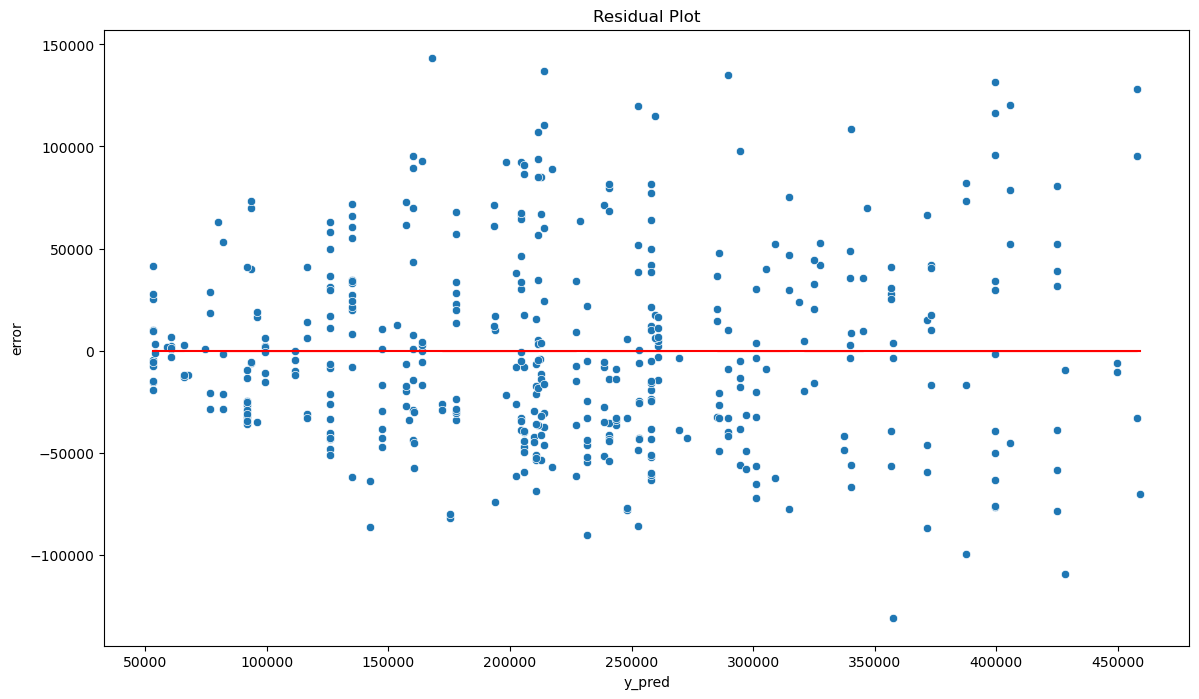

In [187]:
df_error = pd.DataFrame({
    'y_pred':y_pred,
    'error': (y_test - test_preds)
})

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df_error, x="y_pred", y="error")
sns.lineplot(data=df_error, x="y_pred", y=0, color="r")
plt.title("Residual Plot")
plt.show()

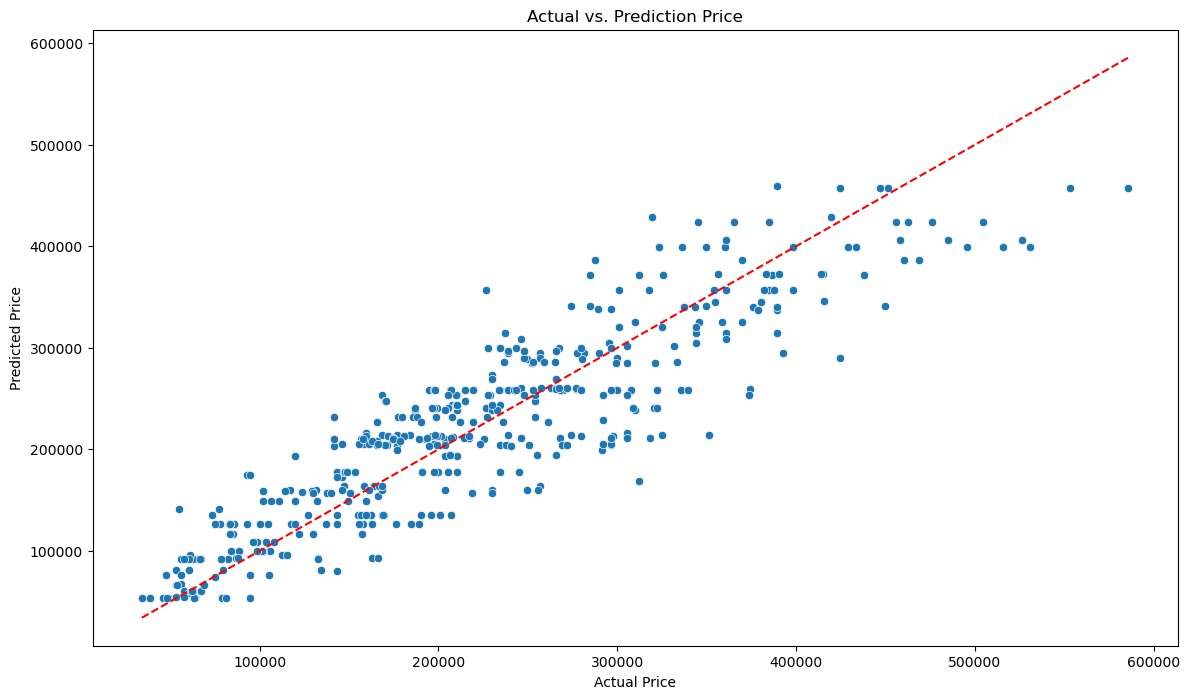

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# Create scatter plot
sns.scatterplot(x=y_test, y=test_preds)

# Plot the line of perfect prediction (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set title and labels
plt.title('Actual vs. Prediction Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.show()


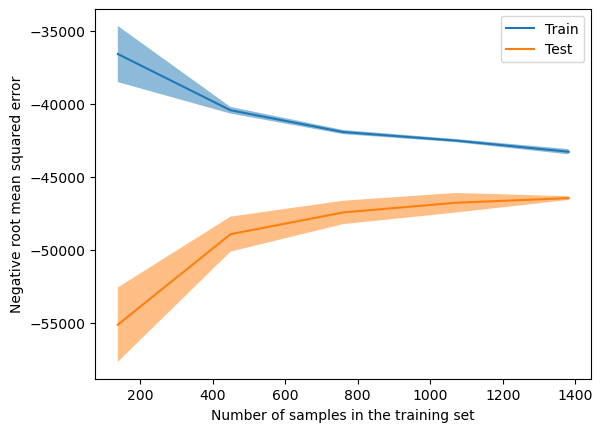

In [199]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(voting_regressor, X_train, y_train, scoring='neg_root_mean_squared_error')

**7.1 Initialization**
- Initialization Function
- Create Custome Metrics
- Create a workflow of the experiment

**7.2 Developing the Model Pipeline**

**7.3 Model Benchmarking (Comparing model base performance)**

**7.4 Tune Model**

**7.5 Analyze Model**

- Evaluate model on data testing
- Residual Analysis
- Learning Curve Inspection

**7.6 Model Calibration (Classification Only)**

**7.6 Model Explanation and Interpretation**
- Feature Importance (Tree Based Model) / Coefficient Regression (Regression Based Model)
- SHAP Value identification
- Counter Factual Analysis

## **Section 8. Model Deployment**

## **Section 9. Model Implementation**

**9.1 How to implement the model ?**


**9.2 What are the limitations of the model ?**

**9.3 Business Calculation (Simulation using unseen data)**

## **Section 10. Conclusion and Recommendation**

**10.1 Conclusion**
- Conclusion (Model)
- Conclusion (Business)

**10.2 Recommendation**
- Recommendation (Model)
- Recommendation (Business)